## <center>CITS5508 Assignment2</center>

**By: Adharsh Sundaram Soudakar(23796349)**<br>


In [1]:
#Importing all the required functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Importing the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = load_breast_cancer(as_frame=True).frame

In [3]:
#Sorting based on column names and getting the first 10 features
df_sorted = df.sort_index(axis=1)
df_10_sorted = df_sorted.iloc[:, :10]
df_10_sorted_without_class = df_10_sorted.copy()
df_10_sorted["Class"] = df_sorted[['target']]
#data_sorted_numpy = data_sorted.to_numpy()
#X = data1_sorted_numpy[:, :10]


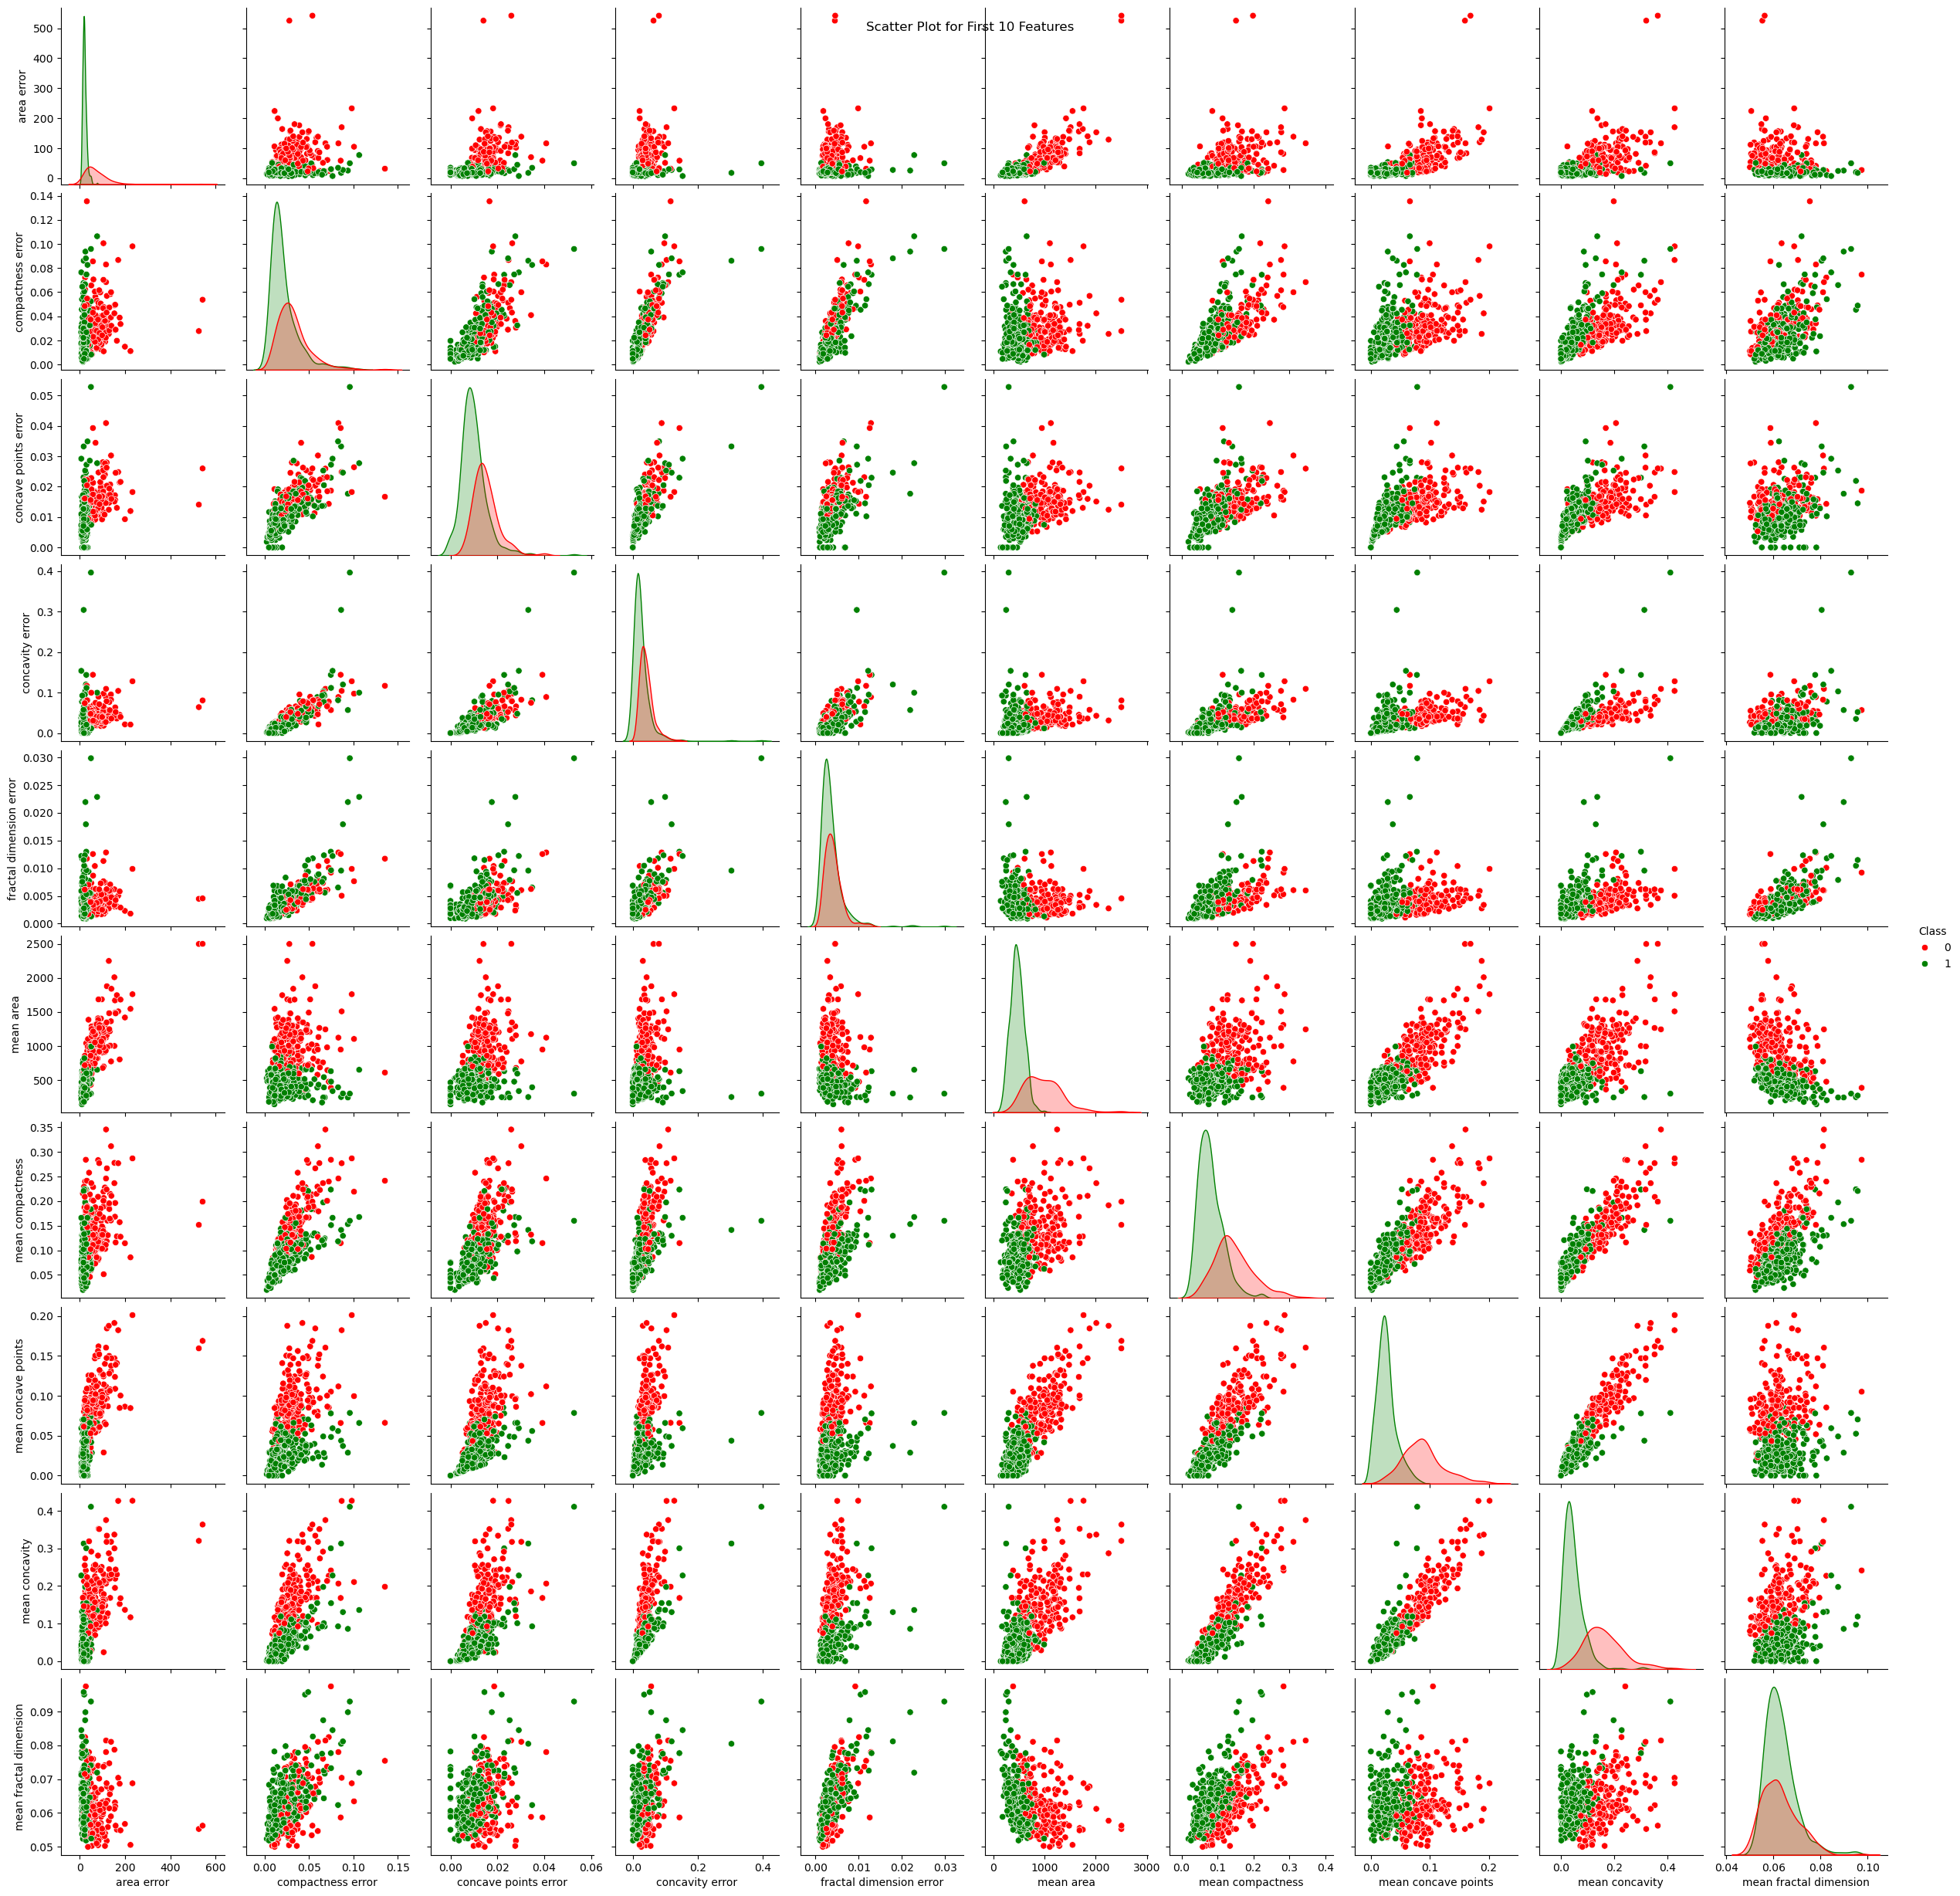

In [4]:
#D1
# Setting color palette for classes
colors = {0: "red", 1: "green"}
# Plotting
sns.pairplot(df_10_sorted, hue="Class", palette=colors)
plt.suptitle("Scatter Plot for First 10 Features")
plt.xlabel("Feature Value")
plt.ylabel("Feature Value")
plt.savefig('scatterplot.jpg', format='jpeg')
plt.show()

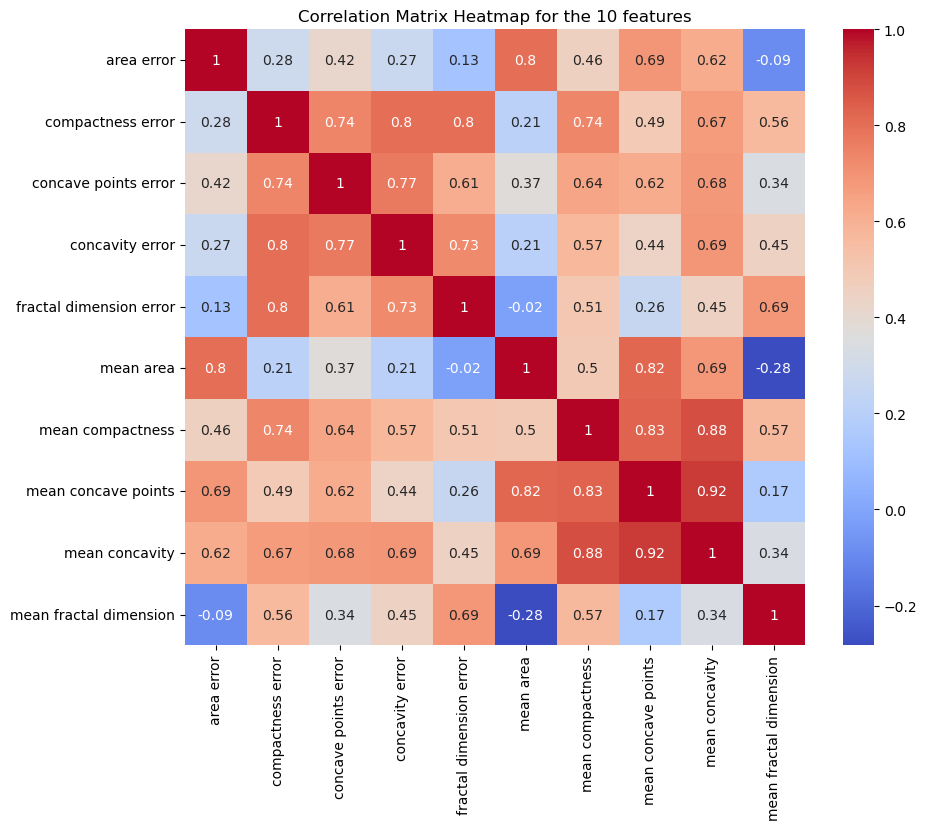

In [5]:
#D3
corr_matrix = df_10_sorted_without_class.corr()

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix Heatmap for the 10 features")
plt.savefig('corr_mat.jpg',format='jpeg')
plt.show()

In [6]:
#D5

#Dropping said columns
data_matrix = df.drop(columns=['mean perimeter','mean radius', 'worst radius', 'worst perimeter', 'radius error', 'target'])

In [7]:
#D6

X = data_matrix.to_numpy()
y = df[['target']].to_numpy()

np.random.seed(5508)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

#Classifier with default hyperparameters
dtclf = DecisionTreeClassifier(random_state=5508)

#Training the model
dtclf.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = dtclf.predict(X_train)
y_test_pred = dtclf.predict(X_test)

# Evaluate performance metrics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Training Precision: {precision_train:.2f}")
print(f"Training Recall: {recall_train:.2f}\n")
print(f"Test Accuracy: {accuracy_test:.2f}")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}\n")
print("Confusion Matrix (Test Set):\n", conf_matrix)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00

Test Accuracy: 0.93
Test Precision: 0.96
Test Recall: 0.93

Confusion Matrix (Test Set):
 [[38  3]
 [ 5 68]]


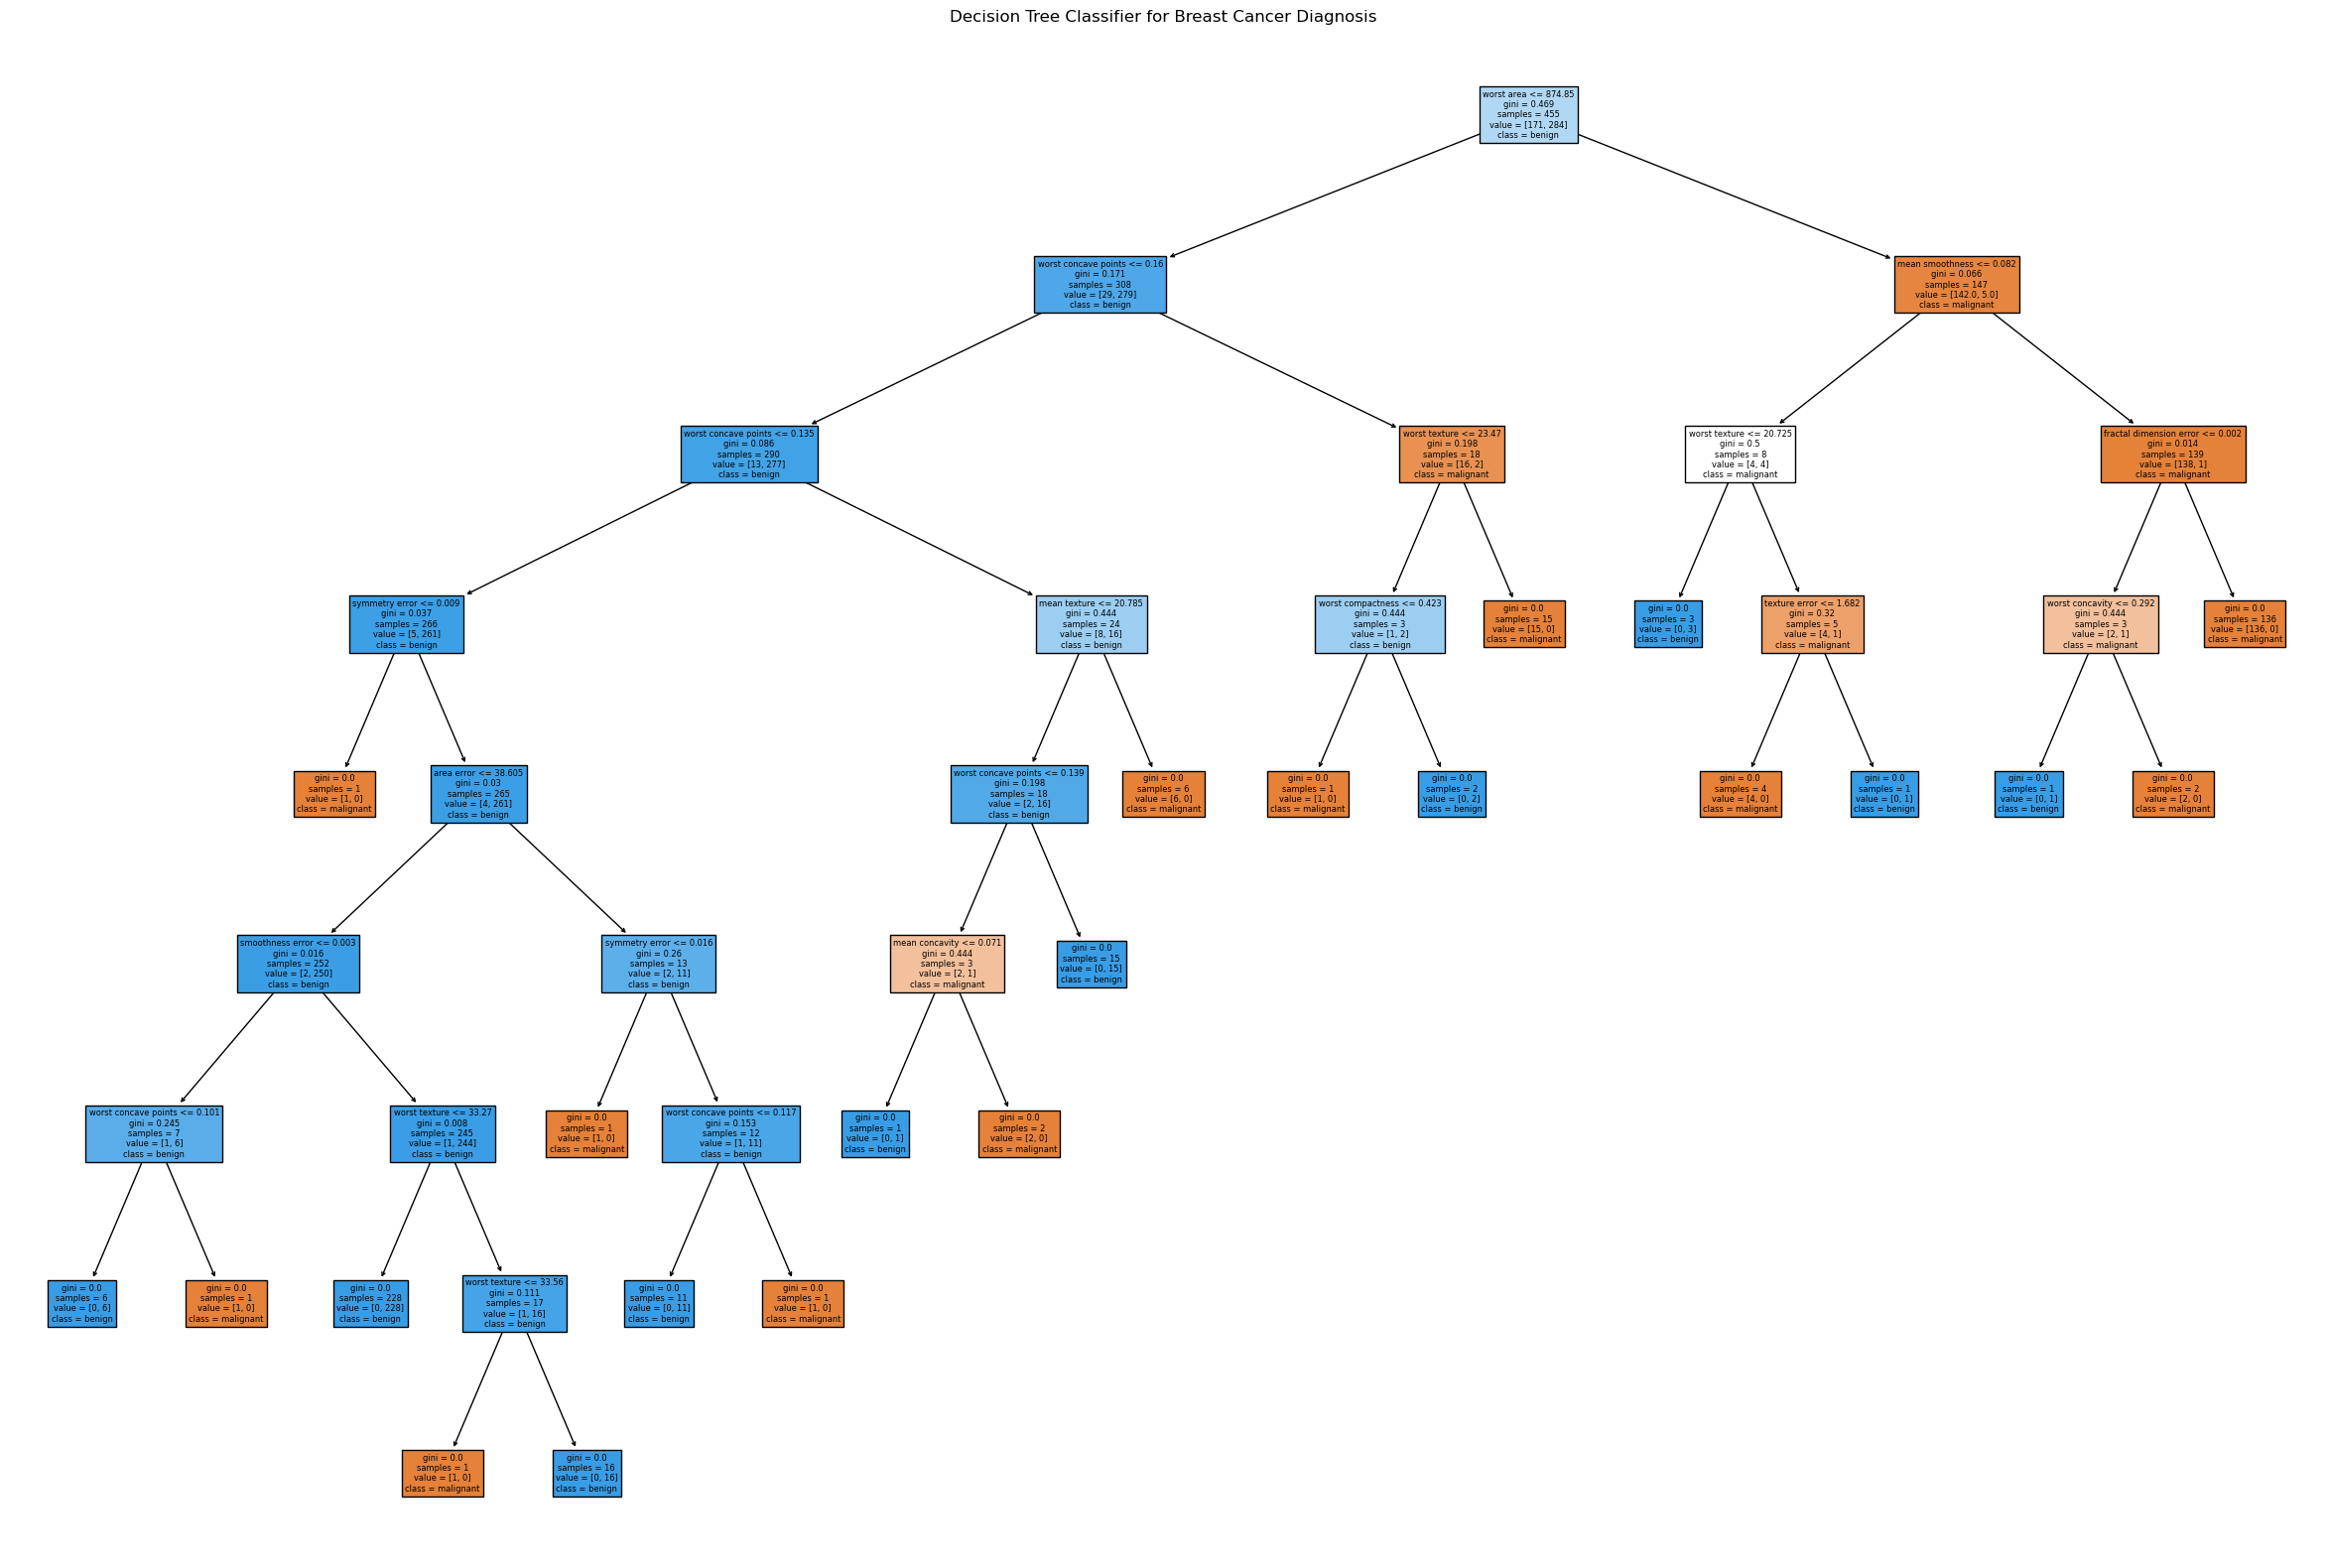

The depth of the decision tree is: 8


In [8]:
#D8
#Plotting the decision tree 
plt.figure(figsize=(30, 20))
plot_tree(dtclf, filled=True, feature_names=data_matrix.columns, class_names=data.target_names)
plt.title("Decision Tree Classifier for Breast Cancer Diagnosis")
plt.savefig('desc_tree.jpg',format='jpeg')
plt.show()
# Get the depth of the decision tree
depth = dtclf.get_depth()

print(f"The depth of the decision tree is: {depth}")


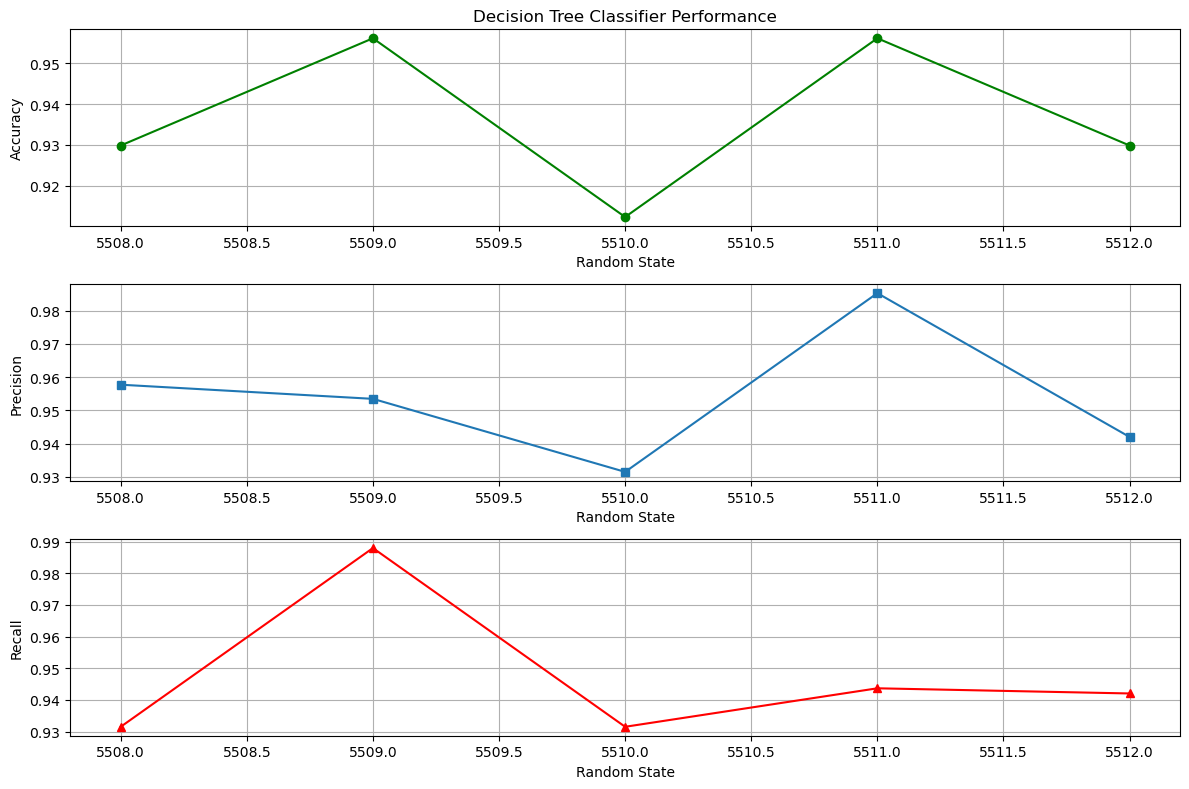

In [9]:
#D10

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []

# Repeat the data split and evaluation process for different random states
random_states = [5508, 5509, 5510, 5511, 5512]
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    dtclf.fit(X_train, y_train)
    y_test_pred = dtclf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_test_pred))
    precision_scores.append(precision_score(y_test, y_test_pred))
    recall_scores.append(recall_score(y_test, y_test_pred))

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(random_states, accuracy_scores, label='Accuracy', marker='o', color = 'g')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(random_states, precision_scores, label='Precision', marker='s')
plt.xlabel('Random State')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(random_states, recall_scores, label='Recall', marker='^', color = 'r')
plt.xlabel('Random State')
plt.ylabel('Recall')
plt.grid(True)

plt.tight_layout()
plt.show()

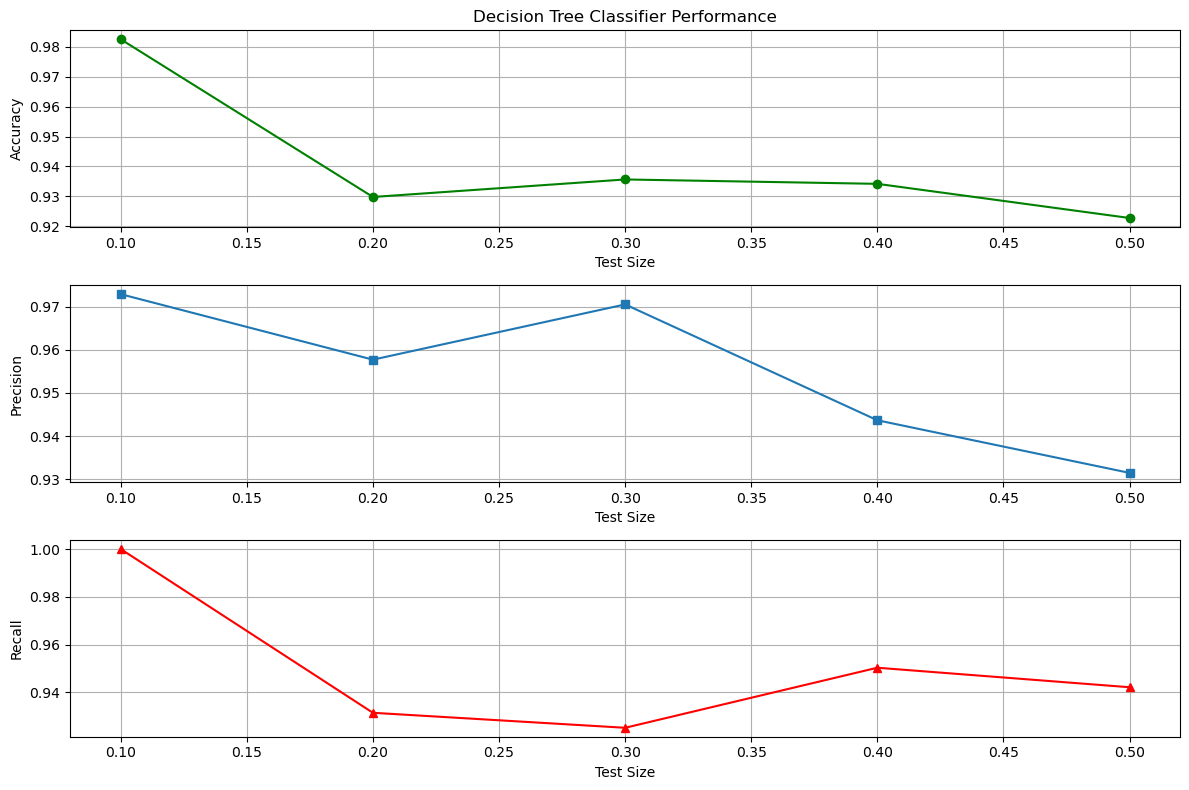

In [10]:
#D11

# Initialize lists to store evaluation metrics
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []

# Repeat the data split and evaluation process for different test sizes
test_sizes = [0.5, 0.4, 0.3, 0.2, 0.1]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5508)
    dtclf.fit(X_train, y_train)
    y_test_pred = dtclf.predict(X_test)
    
    accuracy_scores1.append(accuracy_score(y_test, y_test_pred))
    precision_scores1.append(precision_score(y_test, y_test_pred))
    recall_scores1.append(recall_score(y_test, y_test_pred))

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(test_sizes, accuracy_scores1, label='Accuracy', marker='o', color = 'g')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(test_sizes, precision_scores1, label='Precision', marker='s')
plt.xlabel('Test Size')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(test_sizes, recall_scores1, label='Recall', marker='^', color = 'r')
plt.xlabel('Test Size')
plt.ylabel('Recall')
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
#D12

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

# Define hyperparameters to search
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}

#Stratified sampling for 10 folds
skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with 10-fold cross-validation
grid_search_accuracy = GridSearchCV(dtclf, param_grid, cv=skfolds, scoring='accuracy')
grid_search_accuracy.fit(X_train, y_train)

# Get the best hyperparameters
best_params_accuracy = grid_search_accuracy.best_params_
print("Best hyperparameters for accuracy:", best_params_accuracy)

Best hyperparameters for accuracy: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [12]:
#D12 - continued

# Initialize the decision tree classifier with best hyperparameters
dtclf_bp = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=2, random_state=5508)

# Retrain the model
dtclf_bp.fit(X_train, y_train)

# Predictions on training set
y_train_pred = dtclf_bp.predict(X_train)

# Predictions on test set
y_test_pred = dtclf_bp.predict(X_test)

# Calculate evaluation metrics
accuracy_train_bp = accuracy_score(y_train, y_train_pred)
precision_train_bp = precision_score(y_train, y_train_pred)
recall_train_bp = recall_score(y_train, y_train_pred)

accuracy_test_bp = accuracy_score(y_test, y_test_pred)
precision_test_bp = precision_score(y_test, y_test_pred)
recall_test_bp = recall_score(y_test, y_test_pred)

# Confusion matrix on test set
conf_matrix_bp = confusion_matrix(y_test, y_test_pred)

# Print results
print("Optimal Hyperparameters:", dtclf_bp.get_params())
print("\nTraining Set Metrics:")
print(f"Accuracy: {accuracy_train_bp:.2f}, Precision: {precision_train_bp:.2f}, Recall: {recall_train_bp:.2f}")
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_bp:.2f}, Precision: {precision_test_bp:.2f}, Recall: {recall_test_bp:.2f}")
print("\nConfusion Matrix (Test Set):\n", conf_matrix_bp)

Optimal Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 5508, 'splitter': 'best'}

Training Set Metrics:
Accuracy: 0.98, Precision: 0.97, Recall: 0.99

Test Set Metrics:
Accuracy: 0.95, Precision: 0.97, Recall: 0.95

Confusion Matrix (Test Set):
 [[39  2]
 [ 4 69]]


In [13]:
#D14

# Perform grid search with 10-fold cross-validation for scoring = precision
grid_search_precision = GridSearchCV(dtclf, param_grid, cv=skfolds, scoring='precision')
grid_search_precision.fit(X_train, y_train)

# Get the best hyperparameters
best_params_precision = grid_search_precision.best_params_

#Get the best model
best_model_precision = grid_search_precision.best_estimator_

# Predictions on test set
y_test_pred = best_model_precision.predict(X_test)

# Confusion matrix on test set for scoring = accuracy
print("Best hyperparameters for accuracy:", best_params_accuracy)
print("Confusion Matrix for accuracy (Test Set):\n", conf_matrix_bp)

# Confusion matrix on test set for scoring = precision
conf_matrix_precision = confusion_matrix(y_test, y_test_pred)
print("\nBest hyperparameters for precision:", best_params_precision)
print("Confusion Matrix for precision (Test Set):\n", conf_matrix_precision)

#-------------------------------------------------------------------------------------------
# Perform grid search with 10-fold cross-validation for scoring = recall
grid_search_recall = GridSearchCV(dtclf, param_grid, cv=skfolds, scoring='recall')
grid_search_recall.fit(X_train, y_train)

# Get the best hyperparameters
best_params_recall = grid_search_recall.best_params_
print("\nBest hyperparameters for recall:", best_params_recall)

#Get the best model
best_model_recall = grid_search_recall.best_estimator_

# Predictions on test set
y_test_pred = best_model_recall.predict(X_test)

# Confusion matrix on test set for scoring = recall
conf_matrix_recall = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for recall (Test Set):\n", conf_matrix_recall)


Best hyperparameters for accuracy: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Confusion Matrix for accuracy (Test Set):
 [[39  2]
 [ 4 69]]

Best hyperparameters for precision: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Confusion Matrix for precision (Test Set):
 [[39  2]
 [ 4 69]]

Best hyperparameters for recall: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Confusion Matrix for recall (Test Set):
 [[38  3]
 [ 4 69]]


In [14]:
#D15
# Get feature importances
feature_importances = dtclf_bp.feature_importances_

# Create a DataFrame to display feature importances
feature_df = pd.DataFrame({'Feature': data_matrix.columns, 'Importance': feature_importances})

# Sort by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#Finding the max width of first column to space everything equally
max_width = feature_df['Feature'].str.len().max()

# Display the top features
print("Feature".ljust(max_width+2), "Importance")
for i, row in feature_df.iterrows():
    print(f"{row['Feature'].ljust(max_width)} \t{row['Importance']:.2f}")

Feature                   Importance
worst area              	0.76
worst concave points    	0.14
mean texture            	0.05
mean smoothness         	0.02
worst texture           	0.01
area error              	0.01
perimeter error         	0.00
fractal dimension error 	0.00
concave points error    	0.00
worst symmetry          	0.00
worst concavity         	0.00
worst compactness       	0.00
worst smoothness        	0.00
symmetry error          	0.00
compactness error       	0.00
concavity error         	0.00
mean area               	0.00
smoothness error        	0.00
texture error           	0.00
mean fractal dimension  	0.00
mean symmetry           	0.00
mean concave points     	0.00
mean concavity          	0.00
mean compactness        	0.00
worst fractal dimension 	0.00


In [21]:
# Create a SelectFromModel instance
sfm = SelectFromModel(dtclf_bp, threshold=0.01)  # Set the threshold to 1%

# Fit and transform the data to retain important features
X_reduced = sfm.transform(X)

# Get the indices of the retained features
selected_feature_indices = sfm.get_support()

# Get the names of the retained features
selected_features = data_matrix.columns[selected_feature_indices]

# Report the retained features
print("Retained features:")
print(selected_features)

# Report the removed features
removed_features = data_matrix.columns[~selected_feature_indices]
print("\nRemoved features:")
print(removed_features)

# Calculate the total feature importance value retained
total_importance_retained = feature_importances[selected_feature_indices].sum()
print(f"\nTotal feature importance retained: {total_importance_retained:.2f}")

Retained features:
Index(['mean texture', 'mean smoothness', 'worst texture', 'worst area',
       'worst concave points'],
      dtype='object')

Removed features:
Index(['mean area', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

Total feature importance retained: 0.99


In [17]:
#D17
X_train_reduced = sfm.transform(X_train)
X_test_reduced = sfm.transform(X_test)

# Perform grid search with 10-fold cross-validation for the reduced features
grid_search_reduced = GridSearchCV(dtclf, param_grid, cv=skfolds, scoring='accuracy')
grid_search_reduced.fit(X_train_reduced, y_train)

best_model_reduced = grid_search_reduced.best_estimator_

# Predictions on training set
y_train_pred_reduced = best_model_reduced.predict(X_train_reduced)

# Predictions on test set
y_test_pred_reduced = best_model_reduced.predict(X_test_reduced)

# Calculate evaluation metrics
accuracy_train_reduced = accuracy_score(y_train, y_train_pred_reduced)
precision_train_reduced = precision_score(y_train, y_train_pred_reduced)
recall_train_reduced = recall_score(y_train, y_train_pred_reduced)

accuracy_test_reduced = accuracy_score(y_test, y_test_pred_reduced)
precision_test_reduced = precision_score(y_test, y_test_pred_reduced)
recall_test_reduced = recall_score(y_test, y_test_pred_reduced)

# Confusion matrix on test set for reduced features
conf_matrix_reduced = confusion_matrix(y_test, y_test_pred_reduced)


print("\nTraining Set Metrics:")
print("\nAll features:")
print(f"Accuracy: {accuracy_train_bp:.2f}, Precision: {precision_train_bp:.2f}, Recall: {recall_train_bp:.2f}")
print("Reduced features:")
print(f"Accuracy: {accuracy_train_reduced:.2f}, Precision: {precision_train_reduced:.2f}, Recall: {recall_train_reduced:.2f}")
print("\nTest Set Metrics:")
print("\nAll features:")
print(f"Accuracy: {accuracy_test_bp:.2f}, Precision: {precision_test_bp:.2f}, Recall: {recall_test_bp:.2f}")
print("Reduced features:")
print(f"Accuracy: {accuracy_test_reduced:.2f}, Precision: {precision_test_reduced:.2f}, Recall: {recall_test_reduced:.2f}")
print("\nConfusion Matrices:")
print("\nConfusion Matrix for all features (Test Set):\n", conf_matrix_bp)
print("Confusion Matrix for reduced features (Test Set):\n", conf_matrix_reduced)


Training Set Metrics:

All features:
Accuracy: 0.98, Precision: 0.97, Recall: 0.99
Reduced features:
Accuracy: 0.98, Precision: 0.97, Recall: 1.00

Test Set Metrics:

All features:
Accuracy: 0.95, Precision: 0.97, Recall: 0.95
Reduced features:
Accuracy: 0.96, Precision: 0.97, Recall: 0.97

Confusion Matrices:

Confusion Matrix for all features (Test Set):
 [[39  2]
 [ 4 69]]
Confusion Matrix for reduced features (Test Set):
 [[39  2]
 [ 2 71]]


In [18]:
#D19
# Create a Random Forest classifier
rfclf = RandomForestClassifier(random_state=5508)

# Define hyperparameters to search
param_grid_rfclf = {
    'n_estimators': [10, 20, 50, 100, 1000],
    'max_depth': [2, 3, 4, 5]
}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rfclf, param_grid=param_grid_rfclf, cv=skfolds, scoring='accuracy')
grid_search.fit(X_train, y_train.ravel())

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Report the best hyperparameters
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

Best n_estimators: 50
Best max_depth: 5
Test set accuracy: 0.98


In [19]:
#D19 continued
# Create a new Random Forest classifier with the optimal hyperparameters
rfclf_optimal = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=5508)
rfclf_optimal.fit(X_train, y_train.ravel())

# Predictions on training set
y_train_pred = rfclf_optimal.predict(X_train)

# Predictions on test set
y_test_pred = rfclf_optimal.predict(X_test)

# Calculate metrics on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Calculate metrics on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Confusion matrix on test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Report the results
print(f"Optimal number of estimators: {best_n_estimators}")
print(f"Optimal max depth: {best_max_depth}\n")

print("Training set metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}\n")

print("Test set metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}\n")

print("Confusion matrix on test set:")
print(conf_matrix)

Optimal number of estimators: 50
Optimal max depth: 5

Training set metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00

Test set metrics:
Accuracy: 0.98
Precision: 0.99
Recall: 0.99

Confusion matrix on test set:
[[40  1]
 [ 1 72]]
